<a href="https://colab.research.google.com/github/JanuNandhini/24ADI003-ex-2-24BAD041/blob/main/LIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actual columns in dataset:
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

Normalized columns:
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

Using open column: open
Using close column: close

Model Performance:
Accuracy : 0.5888738127544098
Precision: 1.0
Recall   : 0.013029315960912053
F1 Score : 0.02572347266881029


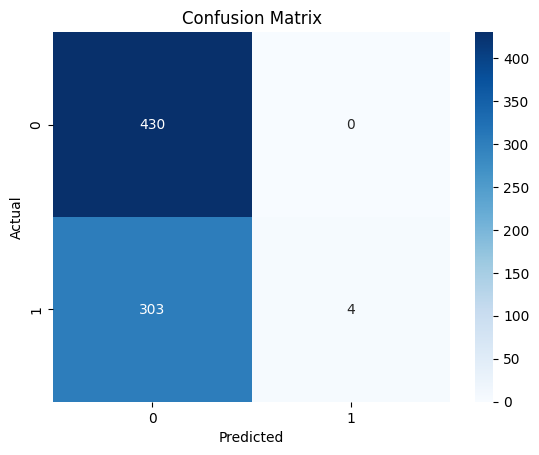

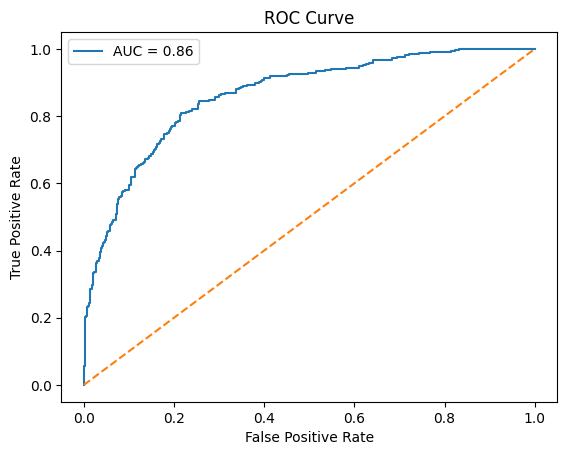

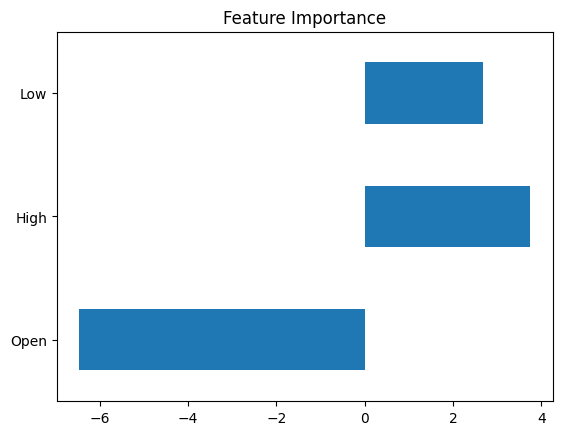


Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

df = pd.read_csv(r"/content/LICI - 10 minute data (1).csv")
print("Actual columns in dataset:")
print(df.columns)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nNormalized columns:")
print(df.columns)
open_col = None
close_col = None
for col in df.columns:
    if col == "open":
        open_col = col
    if "close" in col:
        close_col = col
if open_col is None or close_col is None:
    raise Exception("Open or Close column not found in dataset")
print(f"\nUsing open column: {open_col}")
print(f"Using close column: {close_col}")
df["price_movement"] = (df[close_col] > df[open_col]).astype(int)
X = df[[open_col, "high", "low"]]
y = df["price_movement"]
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nModel Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

pd.Series(
    model.coef_[0],
    index=["Open", "High", "Low"]
).plot(kind="barh")

plt.title("Feature Importance")
plt.show()

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring="f1"
)
grid.fit(X_train, y_train)

print("\nBest parameters:", grid.best_params_)